## Here I am going to perform an analysis of insurance data. We will perform linear regression analysis over two columns Age and Charges. 

### As I have an intuition that medical insurance charges will be dependent on Age

In [2]:
import pandas as pd;
#Get CSV data
insurance_data = pd.read_csv('./insurance.csv')
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Sort the data corresponding to x values(Age)

In [3]:
import numpy as np

df = pd.DataFrame(insurance_data)
#sort the data 
sorted_insurance_data = df.sort_values(by=['age'])

Age_data = np.array(sorted_insurance_data.age)
charges_data = np.array(sorted_insurance_data.charges)



### Plot Scatter chart to show the relation between Age and Charges

In [4]:
#Plot create function
import matplotlib.pyplot as plt
def show_scatter_plot(title, 
                      x_label, y_label, 
                      x_values, y_values):
    plt.figure(figsize=(26, 7)) # resize the chart
    plt.rcParams.update({'font.size': 22})
    plt.scatter(x_values, y_values)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()

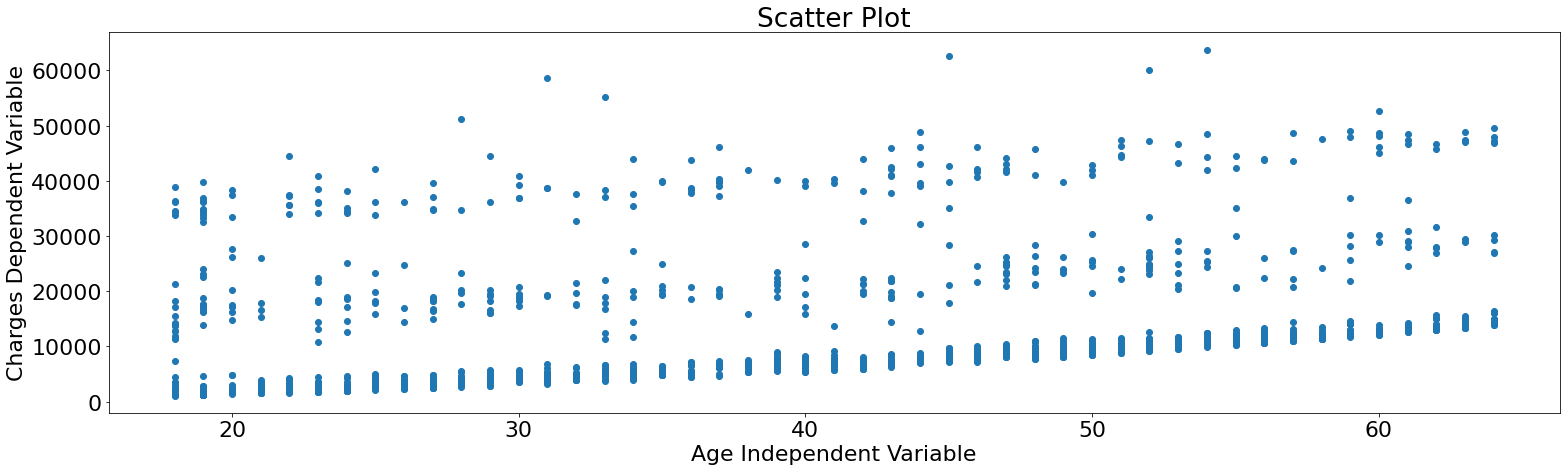

In [5]:
show_scatter_plot('Scatter Plot', 'Age Independent Variable', 
                  'Charges Dependent Variable', Age_data, charges_data)

### Draw the least-squares regression line

In [6]:
def calculate_slope_intercept(Age_data, charges_data):
    x = Age_data
    y = charges_data
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    num   = sum_xy - (sum_x*sum_y)/n
    den = sum_xx - ((sum_x*sum_x)/n)
    
    m = num/den
    b = mean_y - m*mean_x
    
    return m, b  # slope and intercept

In [7]:
#Calculate regression line
def calculate_regression_line(x_values, y_values):
    m, b = calculate_slope_intercept(x_values, y_values)
    reg_line = [m*x + b for x in x_values]  # regression line
    return (reg_line, m, b)

### Show least square line on scatter chart 

In [8]:
def show_least_squares_line(title, x_label, y_label, 
                            x_values, y_values):
    plt.figure(figsize=(26, 7)) # resize the chart
    plt.rcParams.update({'font.size': 22})
    plt.scatter(x_values, y_values)
    
    # Now show the least squares line.
    reg_line, m, b = calculate_regression_line(x_values, y_values)
    plt.plot(x_values, reg_line, color='red')
    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()

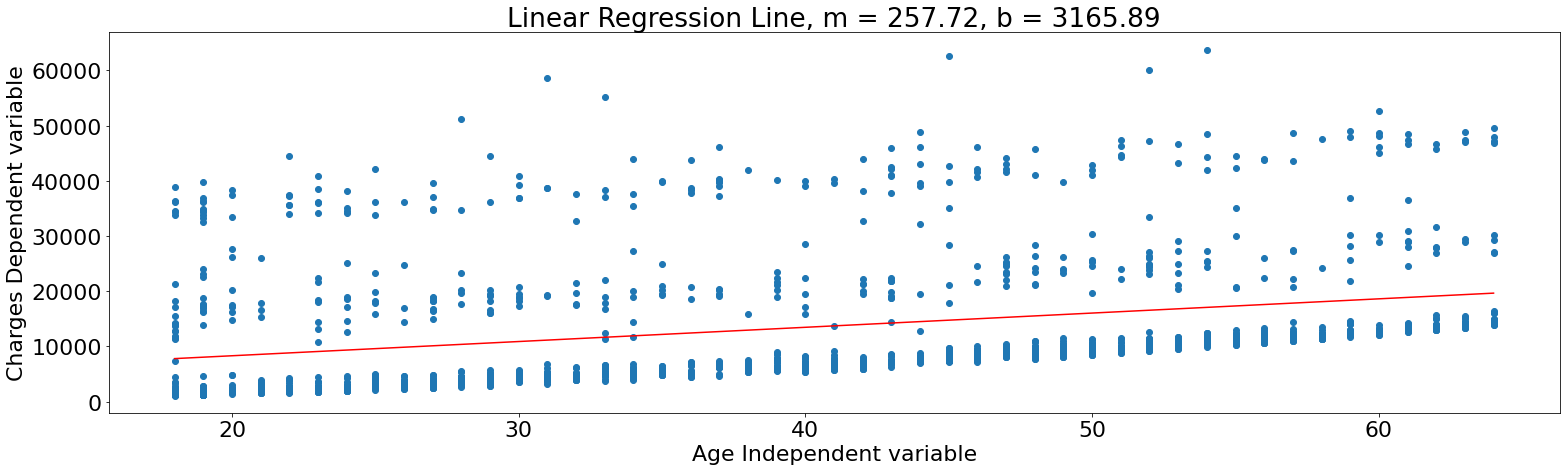

In [9]:
show_least_squares_line('Linear Regression Line', 'Age Independent variable', 
                        'Charges Dependent variable', Age_data, charges_data)

### As we can see in chart, values are scattered from linear regression line now we will calculate the Coefficient and Correlation to analyze the data further.

### Coefficient of Determination

In [10]:
def calculate_coefficient_determination(x_values, y_values):
    y_avg = np.average(y_values)
    reg_line, m, b = calculate_regression_line(x_values, y_values)
    s_total = np.sum(pow((y_values-y_avg),2))
    s_residual = np.sum(pow((y_values-reg_line), 2))
    
    coefficient = 1-s_residual/s_total
    print('s_residual=%4.3f' %s_residual)
    print("s_total=%4.3f" %s_total)
    print("Coefficient of Determination= %2.3f" %coefficient)

In [11]:
#Get the Coefficient determination
calculate_coefficient_determination(Age_data, charges_data)

s_residual=178544029385.216
s_total=196074221568.367
Coefficient of Determination= 0.089


### As per the calculated Coefficient determination = 0.089 it is very less value than 1 hence, it shows how data is scattered.

### Correlation Coefficient

In [12]:
import math
def calculate_correlation_coefficient(x_values, y_values):
        y_avg = np.average(y_values)
        x_avg = np.average(x_values)
        
        num = np.sum((x_values-x_avg)*(y_values-y_avg))
        den1 = math.sqrt(np.sum(pow((x_values-x_avg),2)))
        den2 = math.sqrt(np.sum(pow((y_values-y_avg),2)))
        den = den1 * den2
        correlation = num/den
        print("Correlation coefficient= %2.3f" % correlation)
    

In [13]:
#Get the Correlation of coefficient
calculate_correlation_coefficient(Age_data, charges_data)

Correlation coefficient= 0.299


### As per the calculated Correlation coefficient= 0.299 it shows the how Age_data, charges_data related to one another.